In [1]:
import json
import pycurl
import io
import numpy as np

from core.utils import create_pascal_label_colormap, label_to_color_image

In [2]:
_IMAGE = "assets/stc.jpg"
_LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

In [3]:
c = pycurl.Curl()
b = io.BytesIO()
c.setopt(pycurl.URL, 'http://localhost:5000/model/predict')
c.setopt(pycurl.HTTPHEADER, ['Accept:application/json', 'Content-Type: multipart/form-data'])
c.setopt(pycurl.HTTPPOST, [('image', (pycurl.FORM_FILE, _IMAGE))])
c.setopt(pycurl.WRITEFUNCTION, b.write)
c.perform()
print(c.getinfo(pycurl.RESPONSE_CODE))
c.close()

200


In [4]:
response = b.getvalue()
response = json.loads(response)

In [5]:
import matplotlib
from matplotlib import pyplot
from PIL import Image

In [6]:
image = Image.open(_IMAGE)
image = image.resize(response['image_size'])

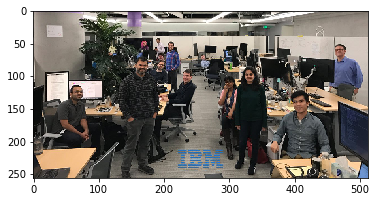

In [7]:
pyplot.imshow(image)

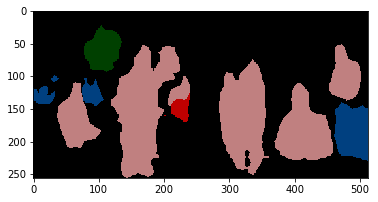

In [8]:
seg_map = np.asarray(response['seg_map'])
seg_image = label_to_color_image(seg_map).astype(np.uint8)
pyplot.imshow(seg_image)

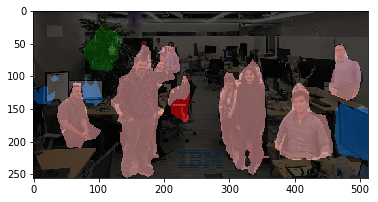

In [9]:
pyplot.imshow(image)
pyplot.imshow(seg_image, alpha=0.7)